In [ ]:
from datasets import load_from_disk, Dataset, DatasetDict
from typing import Union
train_local_dir:str = 'tiny_imagenet_local/train'
val_local_dir:str = 'tiny_imagenet_local/valid'
train_ds: Union[Dataset, DatasetDict] = load_from_disk(train_local_dir)
val_ds: Union[Dataset, DatasetDict] = load_from_disk(val_local_dir)
print(train_ds)
print(val_ds)

Dataset({
    features: ['image', 'label'],
    num_rows: 100000
})
Dataset({
    features: ['image', 'label'],
    num_rows: 10000
})


In [ ]:
import pandas as pd

splits = {'train': 'data/train-00000-of-00001-1359597a978bc4fa.parquet', 'valid': 'data/valid-00000-of-00001-70d52db3c749a935.parquet'}
df = pd.read_parquet("hf://datasets/zh-plus/tiny-imagenet/" + splits["train"])

In [ ]:
df.columns

Index(['image', 'label'], dtype='object')

In [ ]:
byte_data = df.image[0]
byte_data

{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00@\x00@\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\

In [ ]:
import numpy as np
from PIL import Image
import io

def apply_fn(image_dict):
    byte_data = image_dict['bytes']
    img = Image.open(io.BytesIO(byte_data))

    # Convert the image to a NumPy array
    img_array = np.array(img)

    # # Print the shape of the array (e.g., height, width, channels)
    # print(img_array.shape)
    return img_array

In [ ]:
df['image_array'] = df['image'].apply(lambda x: apply_fn(x))

In [ ]:
df.image_array[0].shape

(64, 64, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   image        100000 non-null  object
 1   label        100000 non-null  int64 
 2   image_array  100000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [ ]:
def check_image_array_shapes(df)-> int:
    count:int = 0
    rows_to_drop = []
    expected_shape:tuple = (64, 64, 3)
    for idx, img_array in enumerate(df['image_array']):
        if img_array.shape != expected_shape:
            count +=1
            print(f'Assertion failed at index {idx}: Expected shape {expected_shape}, but got {img_array.shape}')
            rows_to_drop.append(idx)
            #raise Exception(f"Assertion failed at index {idx}: Expected shape {expected_shape}, but got {img_array.shape}")
    
    if rows_to_drop:
        df.drop(index=rows_to_drop, inplace=True)
        print(f"Dropped {len(rows_to_drop)} rows with mismatched shapes.")
    
    return count

In [ ]:
try:
    result:int = check_image_array_shapes(df)
    print(result)
except Exception as e:
    print(e)

Assertion failed at index 1854: Expected shape (64, 64, 3), but got (64, 64)
Assertion failed at index 1973: Expected shape (64, 64, 3), but got (64, 64)
Assertion failed at index 2218: Expected shape (64, 64, 3), but got (64, 64)
Assertion failed at index 2360: Expected shape (64, 64, 3), but got (64, 64)
Assertion failed at index 2406: Expected shape (64, 64, 3), but got (64, 64)
Assertion failed at index 2491: Expected shape (64, 64, 3), but got (64, 64)
Assertion failed at index 2683: Expected shape (64, 64, 3), but got (64, 64)
Assertion failed at index 3141: Expected shape (64, 64, 3), but got (64, 64)
Assertion failed at index 3192: Expected shape (64, 64, 3), but got (64, 64)
Assertion failed at index 3357: Expected shape (64, 64, 3), but got (64, 64)
Assertion failed at index 3371: Expected shape (64, 64, 3), but got (64, 64)
Assertion failed at index 3406: Expected shape (64, 64, 3), but got (64, 64)
Assertion failed at index 3416: Expected shape (64, 64, 3), but got (64, 64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98179 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image        98179 non-null  object
 1   label        98179 non-null  int64 
 2   image_array  98179 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [ ]:
df = df.reset_index()

In [ ]:
df.image_array[1854].shape

(64, 64, 3)

In [ ]:
# 

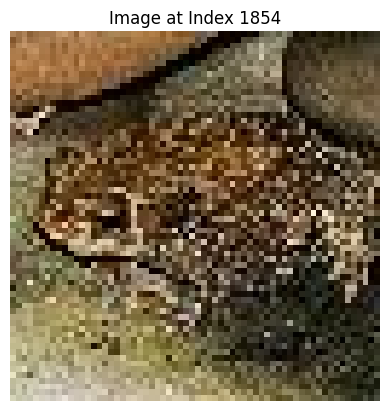

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

image_array = df.image_array[1854]  # Shape: (64, 64, 3)

# Plot the image
plt.imshow(image_array)
plt.axis('off')  # Hide axes
plt.title('Image at Index 1854')
plt.show()

In [ ]:
# import torch

# torch_test = torch.tensor(df['image_array'])

In [ ]:
# 

In [ ]:
# import torch
# tensor_test = torch.tensor(df['image_array'].to_list())
# tensor_test.size

In [16]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
class TinyImageDataset(Dataset):
    def __init__(self, df:pd.DataFrame,image_col:str = 'image_array',  label_col:str = 'label'):
        image_array_stacked = np.stack(df[image_col].tolist(), axis=0)
        label_col_stacked = np.stack(df[label_col].tolist(), axis=0)
        self.image_array = torch.tensor(image_array_stacked, dtype=torch.float32)
        self.image_array = self.image_array / 255.0
        
        # Apply mean and std normalization (e.g., ImageNet stats)
        mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 1, 1, 3)
        std = torch.tensor([0.229, 0.224, 0.225]).view(1, 1, 1, 3)
        self.image_array = (self.image_array - mean) / std
        self.image_labels = torch.tensor(label_col_stacked, dtype=torch.float32)

    def __len__(self):
        return len(self.image_labels)
    
    def __getitem__(self, index):
        image = self.image_array[index]
        label = self.image_labels[index]
        return image, label
    

In [17]:
train_ds = TinyImageDataset(df)

In [18]:
train_ds

In [19]:

train_dataloader = DataLoader(train_ds, batch_size=4, shuffle=True)


torch.Size([4, 64, 64, 3])

Feature batch shape: torch.Size([64])
Labels batch shape: torch.Size([64, 64, 64, 3])


TypeError: Invalid shape () for image data

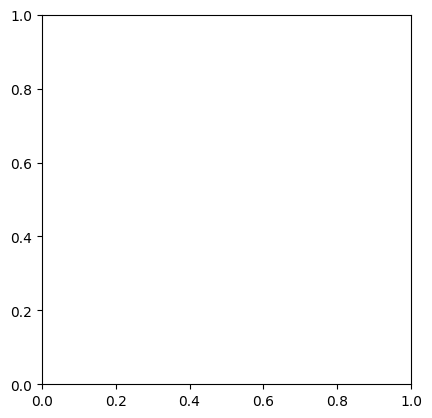

In [ ]:
# # Display image and label.
# train_features, train_labels = next(iter(train_dataloader))
# print(f"Feature batch shape: {train_features.size()}")
# print(f"Labels batch shape: {train_labels.size()}")
# img = train_features[0].squeeze()
# label = train_labels[0]
# plt.imshow(img, cmap="gray")
# plt.show()
# print(f"Label: {label}")

In [ ]:
# 